# TITANIC

Titanic, British luxury passenger liner that sank on April 15, 1912, en route to New York from Southampton, England, on its maiden voyage.

The largest and most luxurious ship afloat, the Titanic had a double-bottomed hull divided into 16 watertight compartments. Because four of these could be flooded without endangering its buoyancy, it was considered unsinkable. Shortly before midnight on April 14, it collided with an iceberg southeast of Cape Race, Newfoundland; five compartments ruptured and the ship sank. Most people on board died.

The RMS 'Titanic' / Print Collector/GettyImages

### Meaning of the variables

The attributes have the following meaning:

Survived : Survival (0 = No; 1 = Yes)

Pclass : passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name, Sex, Age : self-explanatory

SibSp : Number of Siblings/Spouses Aboard

Parch : Number of Parents/Children Aboard

Ticket : ticket id, ticket Number

Fare : passenger Fare (British pound)

Cabin : passenger's cabin number

Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### Importing libraries and reading the dataset

In [2]:
import numpy as np   
import pandas as pd  
import seaborn as sns  
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import missingno as msno # This is a Python library compatible with pandas and built on matplotlib. I use it to visualize the distribution of NaN values. 

In [3]:
df = pd.read_csv('/Users/erikadielingen/P_Titanic/titanic (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Missing values

In [5]:
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
porcentage_missing = missing_values * 100 / len(df)
porcentage_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

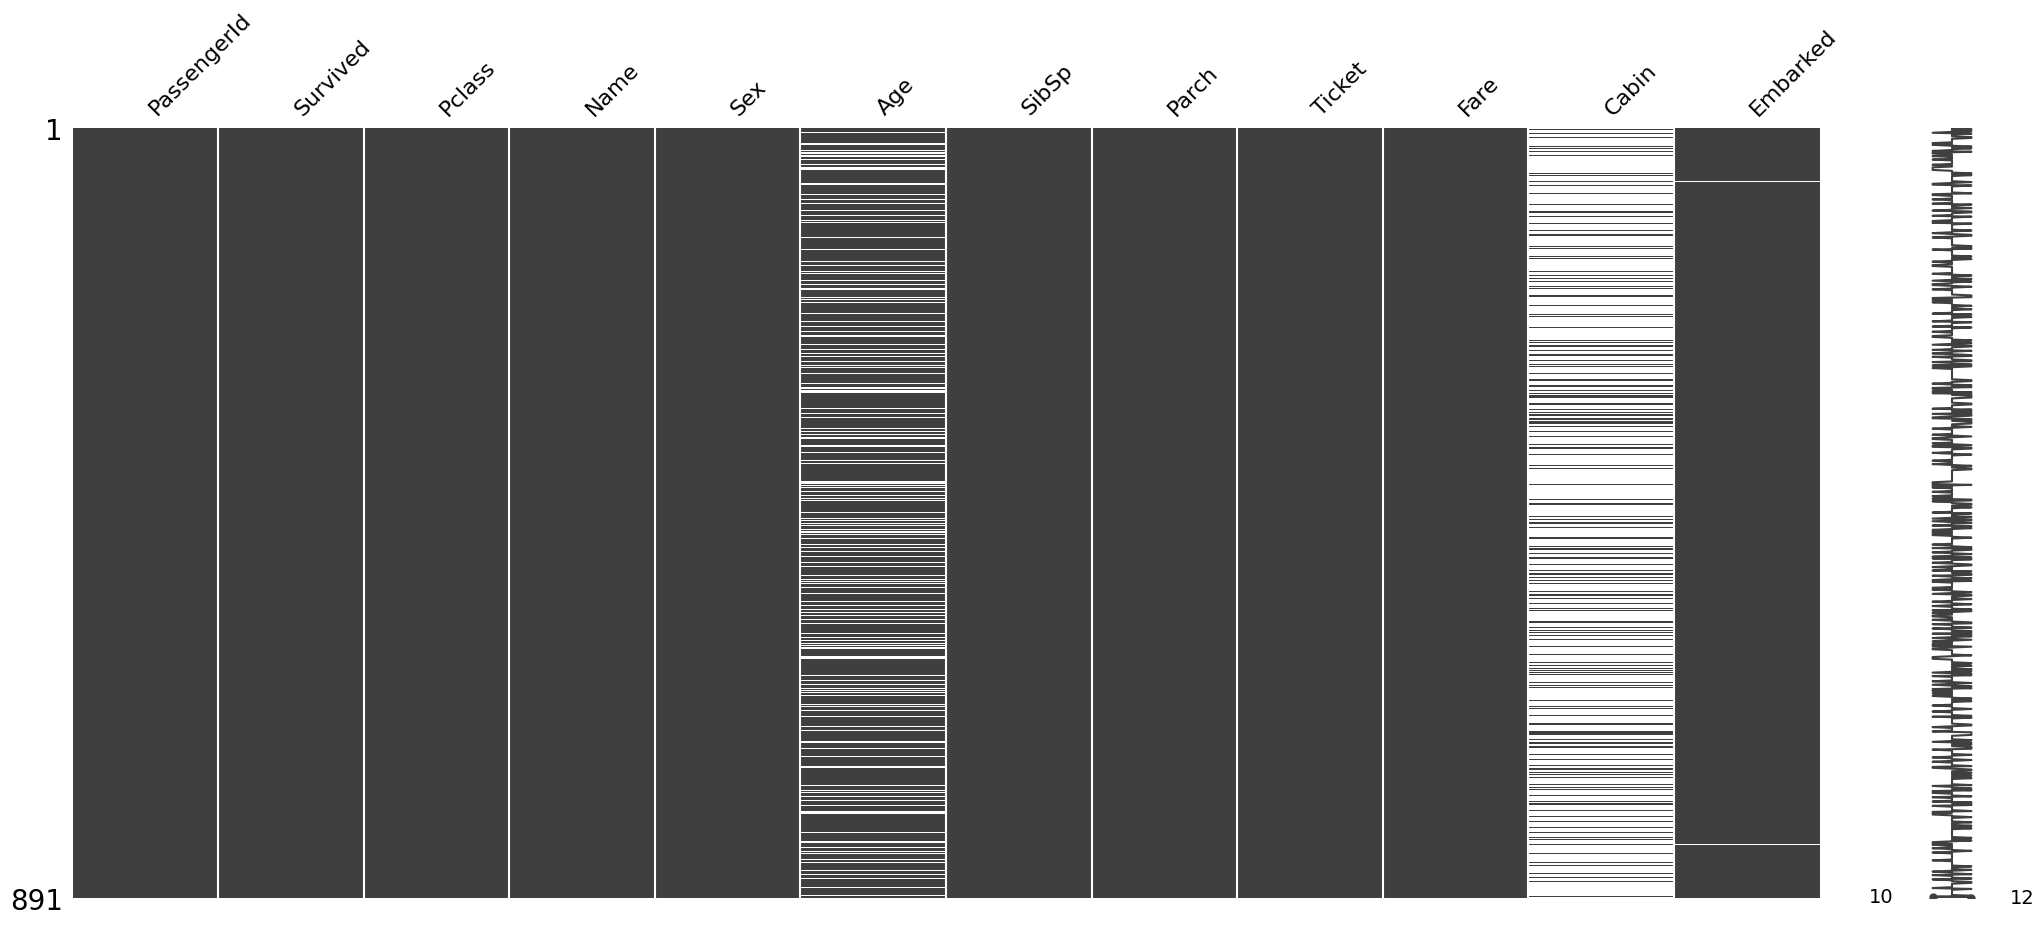

In [7]:
#We can see such NaN values in the following grid
msno.matrix(df)

#### Repairing

In [8]:
df.drop('Cabin', axis=1, inplace=True)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
def repair_values(df):
    for c in df.columns:
        if df[c].isnull().any():
            if df[c].dtype == np.dtype('O'):
                df[c].fillna(df[c].mode()[0], inplace = True)
            else:
                df[c].fillna(df[c].mean(), inplace = True)
    return df

In [11]:
repair_values(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


<Axes: >

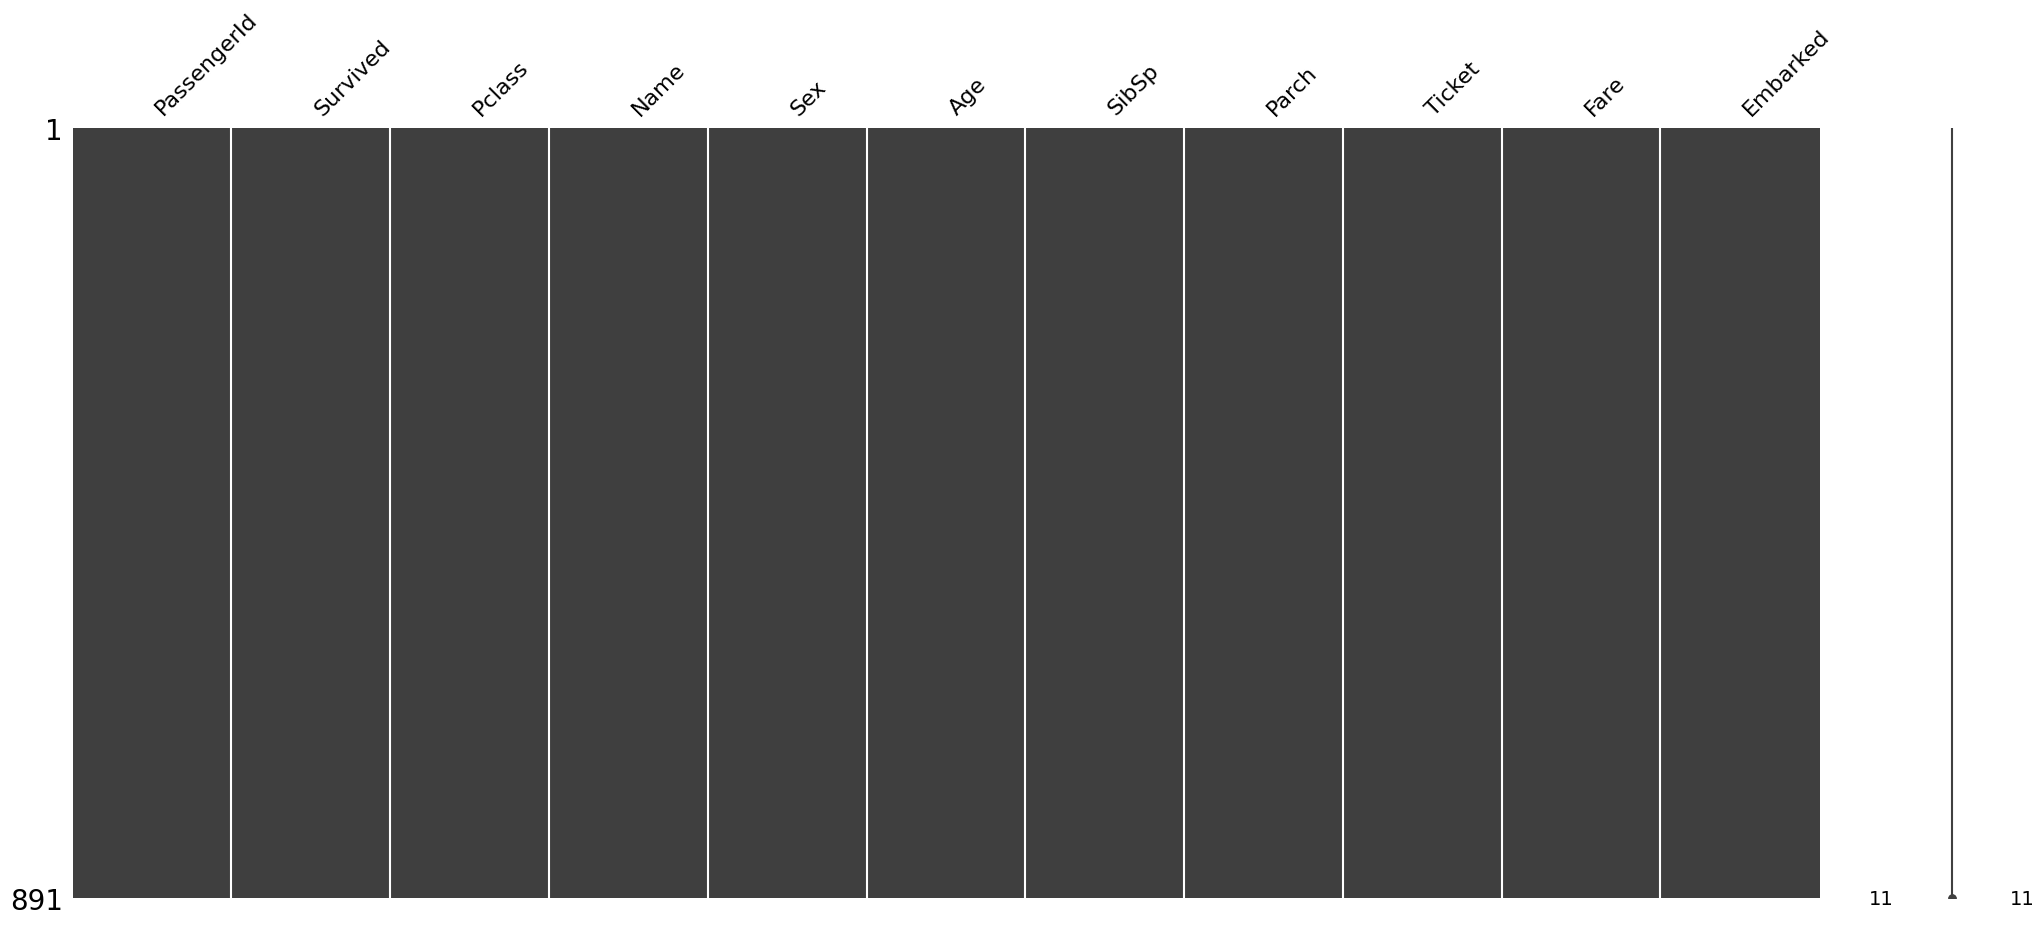

In [12]:
msno.matrix(df)

### Visualizations

#### Understanding mortality on board: how many people survived?

In [13]:
# Let's see how many people survived
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

As we can also see in the following pie, most people on board died in the deadly Shipwreck. 

In [59]:
# We substitute 1 for Survived and 0 for Deceased, so the graph is easier to read 
label_names = {1: 'Survived', 0: 'Deceased'}
df['Survived'] = df['Survived'].map(label_names)
# Creating the pie chart with plotly
fig = go.Figure()
fig.add_trace(go.Pie(labels=df['Survived'].unique(), values=df['Survived'].value_counts(), name='Survival Status'))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=14, marker=dict(line=dict(color='#000000', width=4)))
# The following is for the names
fig.update_layout(legend=dict(x=0.1, y=-0.2))
fig.show()

#### Mortality in Women and Men

Now we will see the ratio of women and men who perished and let's compare the numbers. We know from the reports that the priority over escaping by boate was given to children and women over the men, now let's see how that is reflected on the data.

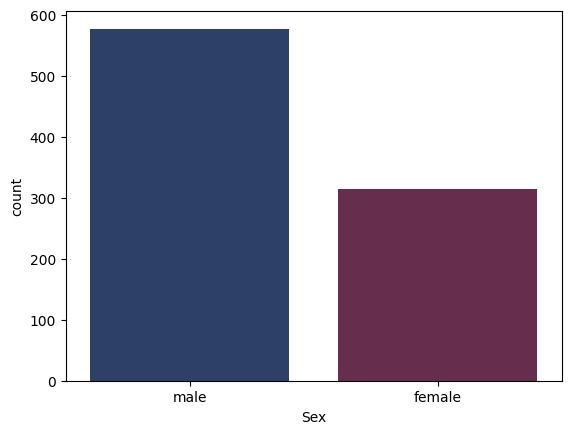

In [57]:
sns.countplot(x='Sex',data=df, palette=['#233d71',"#71234d"]);

In [46]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

As we can see, there were 314 women and 577 men on board. 

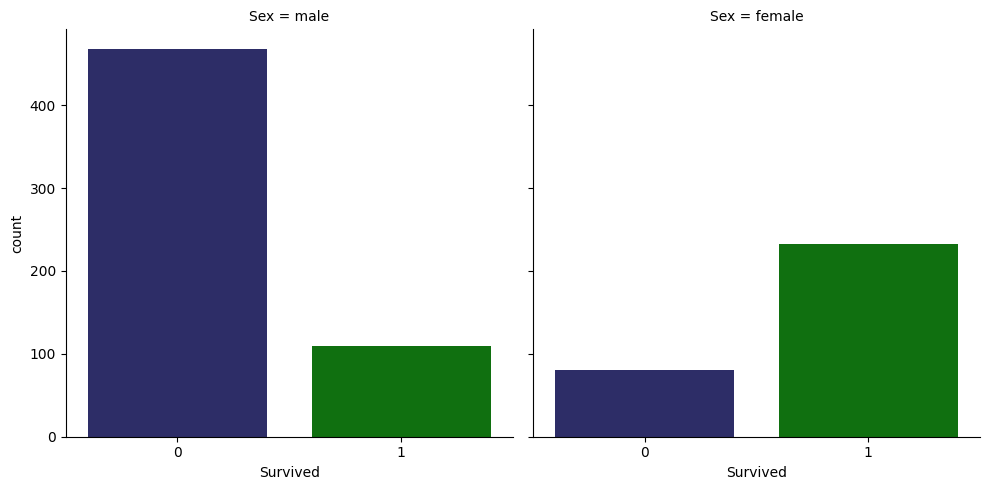

In [33]:
#Now we will see graphically how many women and men survived
sns.catplot(x='Survived', col='Sex', kind='count', data=df, palette = ['#242371', 'green']);

In [98]:
label_names = {'Survived': 1, 'Deceased': 0}
df['Survived'] = df['Survived'].map(label_names)

In [100]:
#We will check that in fact 74% of women survived in comparison to just 18% of men.
female_survived = df.loc[df['Sex'] == 'female', 'Survived'].mean()
male_survived = df.loc[df['Sex'] == 'male', 'Survived'].mean()
print(female_survived)
print(male_survived)

0.7420382165605095
0.18890814558058924


We can also find that the results of the correlation between Survived and Sex are to be expected:

In [30]:
# As we can see, being a male passanger is negatively correlated with survival.
df['Sex'].str.get_dummies().corrwith(df['Survived']/df['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

#### PClase and survival.

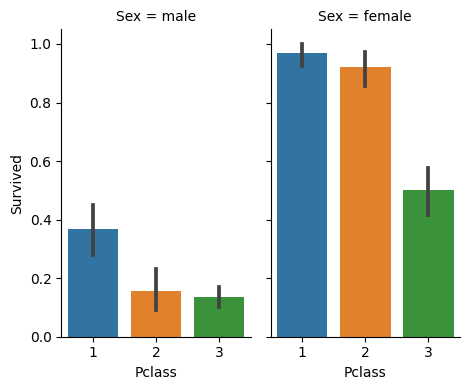

In [112]:
# Survival rate by Sex considering the Pclass
sns.catplot(data = df, x = "Pclass", y = "Survived", col = "Sex", kind = "bar", height = 4, aspect =.6);

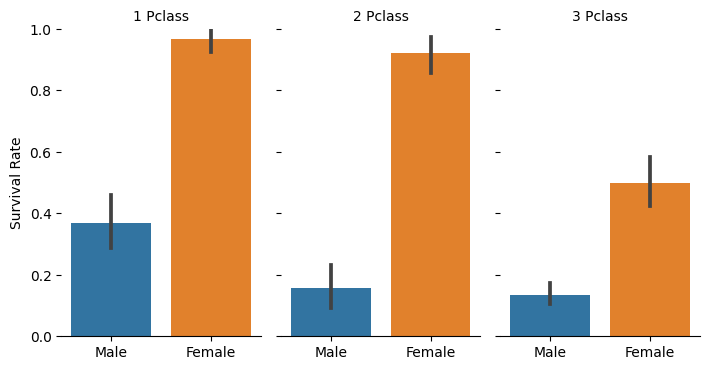

In [15]:
# Similarly, we can also see the survival rate per Pclass considering Sex
r = sns.catplot(data=df, x="Sex", y="Survived", col="Pclass", kind="bar", height=4, aspect=.6,)
r.set_axis_labels("", "Survival Rate")
r.set_xticklabels(["Male", "Female"])
r.set_titles("{col_name} {col_var}")
r.set(ylim=(0, 1))
r.despine(left=True);

It looks as though those who paid more had a higher chance of surviving. 

I think it is also important to keep in mind the fact that there were more third class passangers, than first or second class. Let's check it:

In [40]:
pclass_density = df['Pclass'].value_counts(normalize=True) * 100
print(pclass_density)

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64


##### Intuitively, Fare (which as defined above is the amount paid for a ticket) and Pclass are related, since people pay more for a first class ticket than for a third class one. Therefore, we might get to the conclusion that given the previous results, there could be a positive correlation between Fare and Survived. And indeed:

In [38]:
# We can see it is positively correlated, as expected, with Survived
df['Fare'].corr(df['Survived'])

0.2573065223849622

#### Age

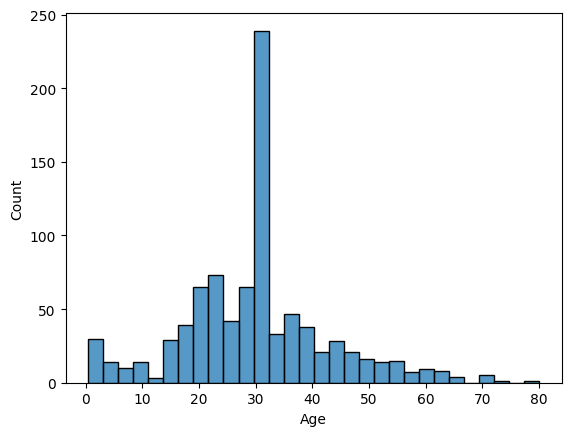

In [65]:
# Let's see how Age is distributed, so we can know our minorities and majorities in the age group.
sns.histplot(df['Age']);

In [79]:
# Just how many minors (Age<16) survived
young_p = len(df[df['Age'] < 16])
young_p

83

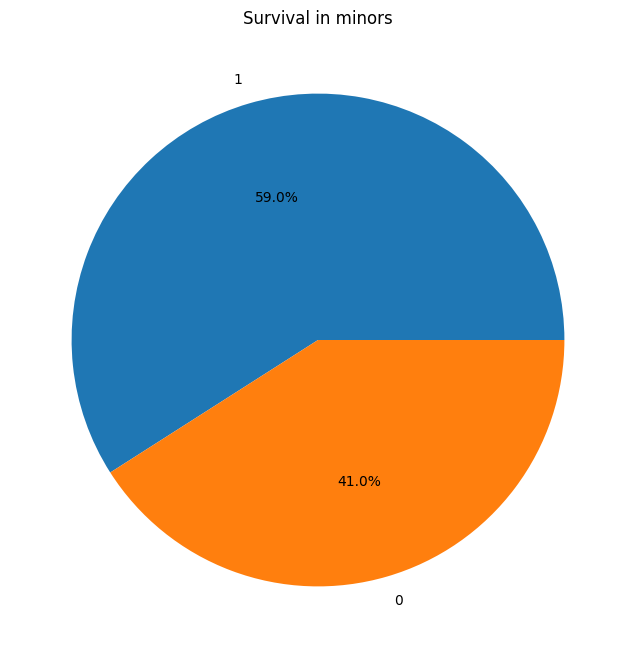

In [19]:
#A significant amount of minors died
survived = df[df['Age'] < 16]['Survived'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(survived, labels=survived.index, autopct='%1.1f%%')
plt.title('Survival in minors');

In [143]:
# Mean of Survived for each Age value
age_smean = df.groupby('Age')['Survived'].mean().reset_index()
age_smean

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
84,70.00,0.0
85,70.50,0.0
86,71.00,0.0
87,74.00,0.0


In [150]:
# The young
p_youngest = df['Age'].min()
p_elder = df['Age'].max()
print(p_youngest)
print(p_elder)

0.42
80.0


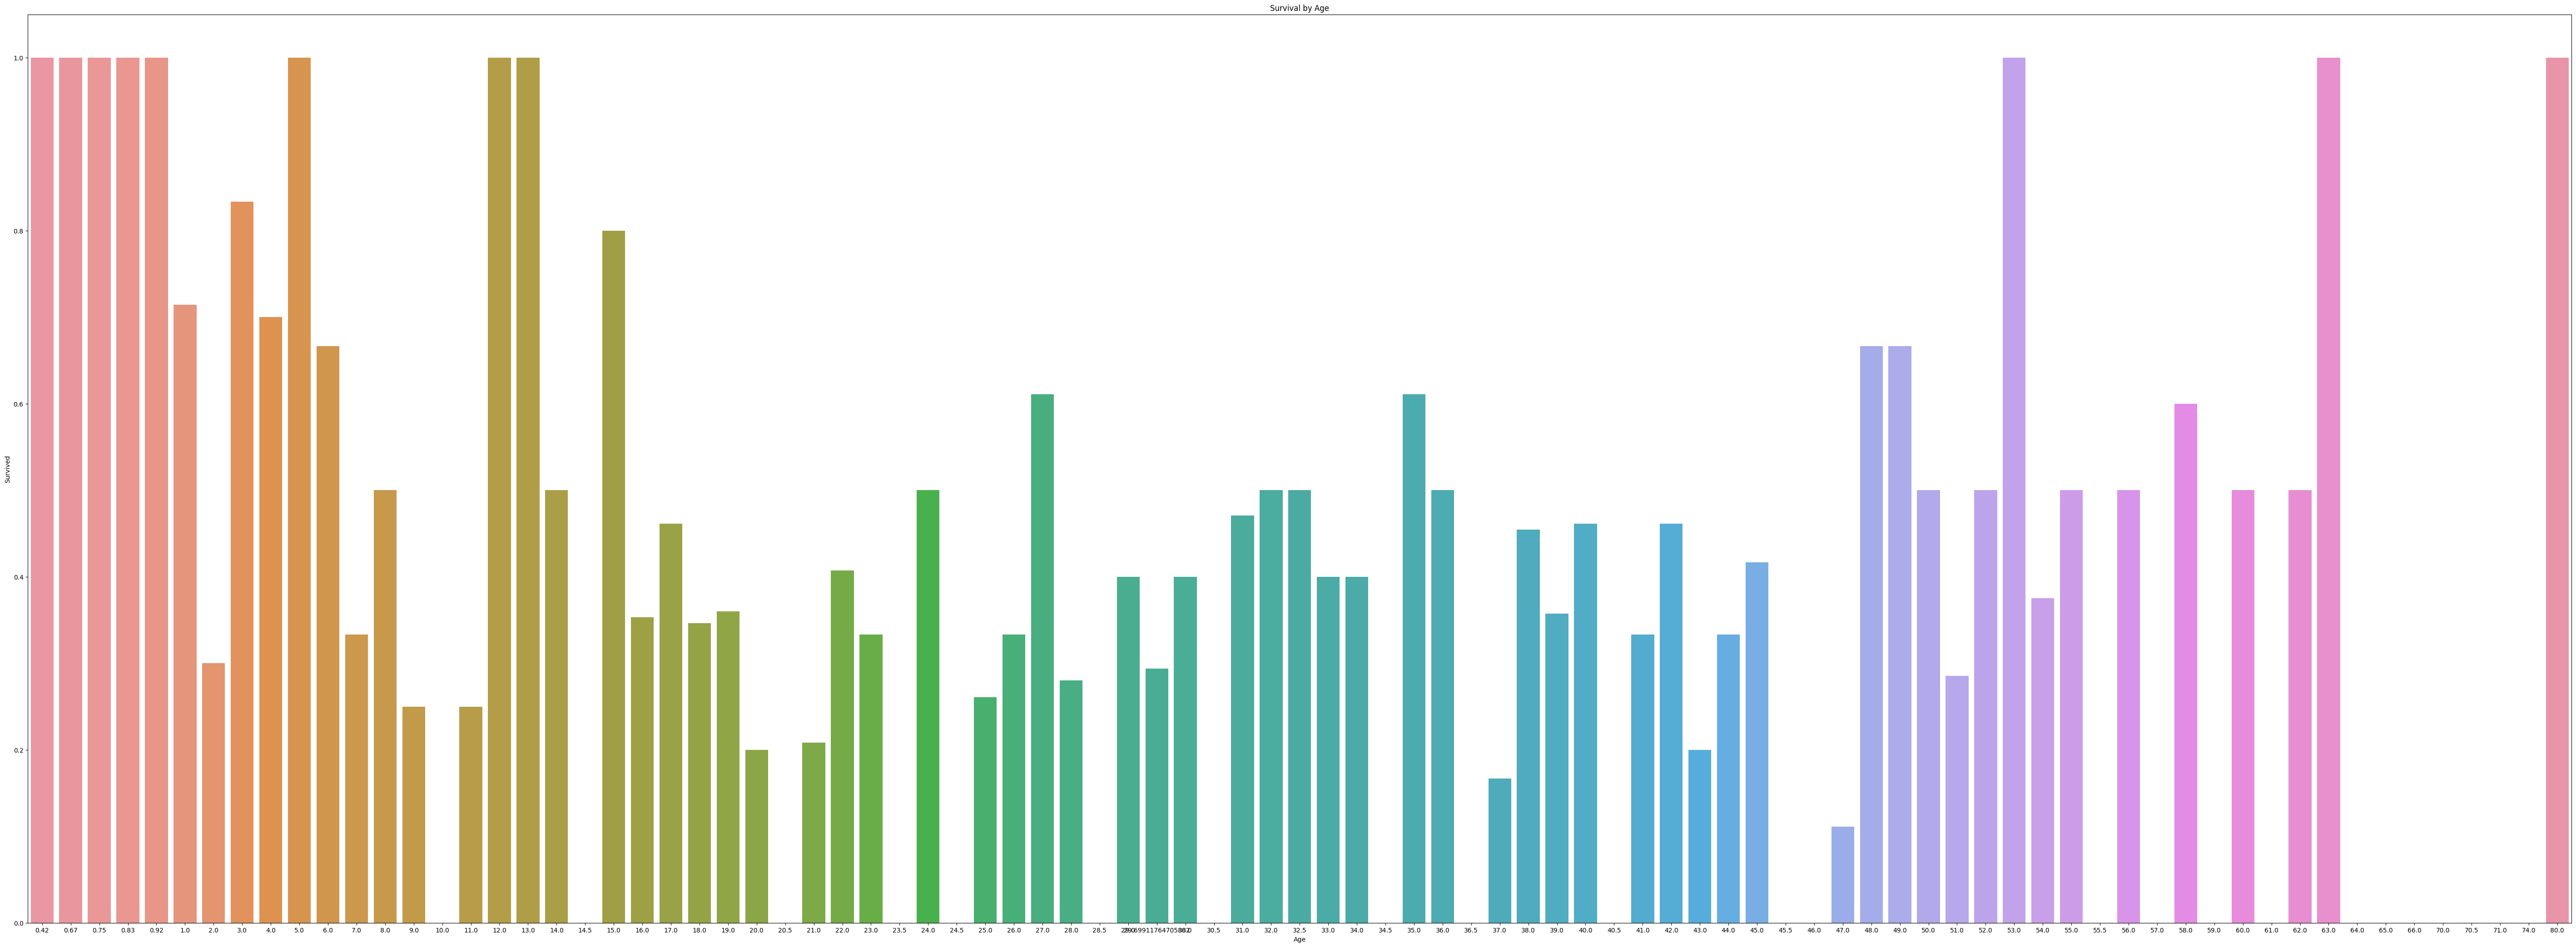

In [152]:
plt.figure(figsize=(80, 25))
sns.barplot(x='Age', y='Survived', data=age_smean, ci = None)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

In [149]:
survivors_by_age = df.groupby('Age')['Survived'].sum()
max_survivor_age = survivors_by_age.idxmax()

print(max_survivor_age)


29.69911764705882


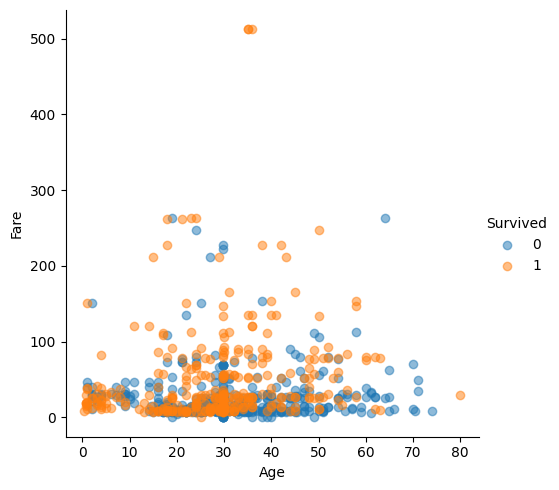

In [55]:
# We can how Fare and Age together relate to Survived.
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, fit_reg=False, scatter_kws={'alpha':0.5});

It seems like the survivors either paid more for their ticket or they were younger.

### Other correlations. 

In [144]:
# Let's use our data and see the correations
c = df.corr(numeric_only=True)
c

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

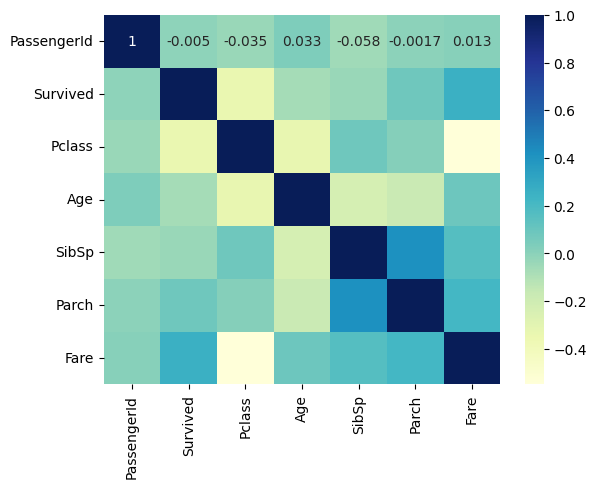

In [145]:
sns.heatmap(c, annot = True, cmap = 'YlGnBu')

It would seem as if: SibSp and Parch has a quite higher correlation. That makes sense. Parents travel with their kids and spouses travel together, usually.